## Working with logistic regression
### Binary classification performance metrics

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read the example data

In [2]:
data_url = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2020/master/week_11/week_11_example_data.csv'
df = pd.read_csv(data_url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   x3      300 non-null    float64
 3   x4      300 non-null    float64
 4   x5      300 non-null    object 
 5   y       300 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 14.2+ KB


Look at the `x5` input variable.

In [4]:
df.nunique()

x1    300
x2    300
x3    300
x4    300
x5      3
y       2
dtype: int64

Summarize the continuous variables.

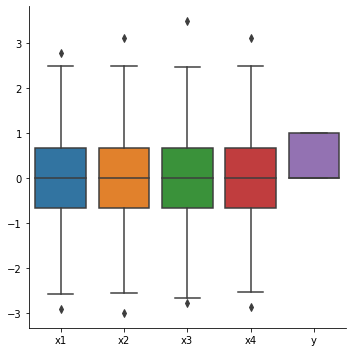

In [5]:
sns.catplot(data = df, kind='box')

plt.show()

In [6]:
df.y.value_counts()

0    198
1    102
Name: y, dtype: int64

In [7]:
df.describe()

,x1,x2,x3,x4,y
count,300.000000,300.000000,300.000000,300.000000,300.0000
mean,-0.000849,0.000261,0.002302,0.001372,0.3400
std,0.998805,1.000864,1.004086,1.001563,0.4745
min,-2.913116,-3.008946,-2.783621,-2.864881,0.0000
25%,-0.673919,-0.671703,-0.673862,-0.673474,0.0000
50%,0.000468,-0.001799,0.001278,0.002178,0.0000
75%,0.673103,0.671835,0.674558,0.670999,1.0000
max,2.783826,3.120873,3.497789,3.128220,1.0000


In [8]:
df.y.mean()

0.34

What are the unique values of `x5`?

In [9]:
df.x5.value_counts()

b    150
a     75
c     75
Name: x5, dtype: int64

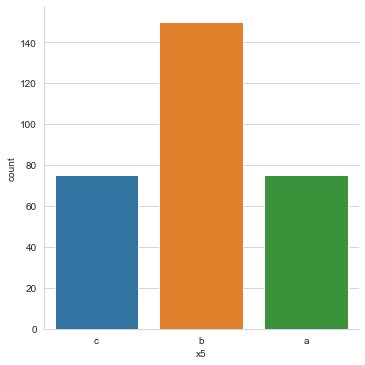

In [11]:
sns.set_style('whitegrid')

sns.catplot(data = df, x='x5', kind='count')

plt.show()

Normally we would do much more visualization and exploration but tonight we will focus on fitting models and assessing performance.

## Fit logistic regression models

In [12]:
import statsmodels.formula.api as smf

Start with out a model that consists all continuous variables as additive linear terms.

$$ \mathrm{logodds} = \beta_0 + \beta_1 x_{n,1} + \beta_2 x_{n,2} + \beta_3 x_{n,3} + \beta_4 x_{n,4} $$

In [13]:
fit_01 = smf.logit(formula = 'y ~ x1 + x2 + x3 + x4', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.594506
         Iterations 5


In [14]:
print( fit_01.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                 0.07259
Time:                        18:57:12   Log-Likelihood:                -178.35
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                 1.296e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7339      0.131     -5.620      0.000      -0.990      -0.478
x1             0.3105      0.130      2.396      0.017       0.057       0.564
x2            -0.5775      0.137     -4.227      0.0

In [15]:
### visualize the coefficients
def my_coefplot_h(model_object, figsize_use=(10, 5)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar(y = model_object.params.index,
               x = model_object.params,
               fmt = 'o', color = 'black', ecolor='black',
               xerr = 2 * model_object.bse,
               elinewidth = 3, ms=10)
    
    ax.axvline(x = 0, linestyle='--', linewidth=5, color='grey')
    
    ax.set_ylabel('coefficient value')
    
    plt.show()

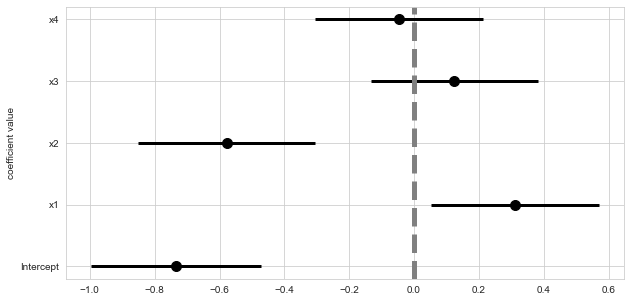

In [16]:
my_coefplot_h(fit_01)

Consider a model with all **pair-wise** interactions between the continuous inputs.

$$ \mathrm{logodds} = \beta_0 + \beta_1 x_{n,1} + \beta_2 x_{n,2} + \beta_3 x_{n,3} + \beta_4 x_{n,4} + \beta_5 x_{n,1} x_{n,2} + \beta_6 x_{n,1} x_{n,3} + \beta_7 x_{n,1} x_{n,4} + \beta_8 x_{n,2} x_{n,3} + \beta_9 x_{n,2} x_{n,4} + \beta_{10} x_{n,3} x_{n,4} $$

In [17]:
fit_02 = smf.logit(formula='y ~ (x1 + x2 + x3 + x4) ** 2', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.587858
         Iterations 6


In [18]:
print( fit_02.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           10
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                 0.08296
Time:                        19:04:25   Log-Likelihood:                -176.36
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                 0.0004151
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7215      0.132     -5.459      0.000      -0.981      -0.462
x1             0.2932      0.136      2.163      0.031       0.028       0.559
x2            -0.5845      0.139     -4.210      0.0

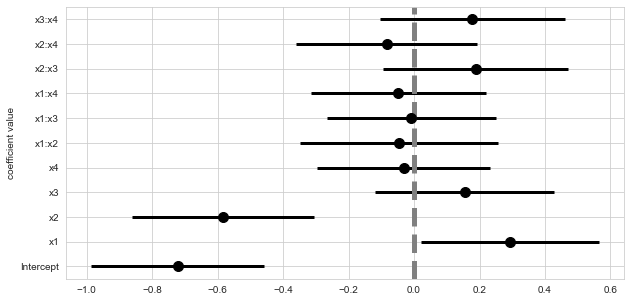

In [19]:
my_coefplot_h(fit_02)

Try out a model with just the categorical input, `x5`.

In [20]:
df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5     object
y       int64
dtype: object

In [21]:
fit_03 = smf.logit(formula = 'y ~ x5', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.634259
         Iterations 5


In [22]:
print( fit_03.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                 0.01057
Time:                        19:13:37   Log-Likelihood:                -190.28
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                    0.1309
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5179      0.239     -2.170      0.030      -0.986      -0.050
x5[T.b]       -0.3937      0.299     -1.315      0.188      -0.980       0.193
x5[T.c]        0.1677      0.335      0.501      0.6

There are a finite set of values that `x5` can take. 

In [23]:
df.x5.value_counts()

b    150
a     75
c     75
Name: x5, dtype: int64

### DUMMY VARIABLES

Let's look at the **DESIGN MATRIX** to see the dummy variables. We will use the `dmatrices()` function from the `patsy` module.

In [24]:
from patsy import dmatrices

In [25]:
y03, X03 = dmatrices('y ~ x5', df, return_type='dataframe')

In [26]:
print( type(y03) )

<class 'pandas.core.frame.DataFrame'>


In [27]:
print(type(X03))

<class 'pandas.core.frame.DataFrame'>


In [28]:
X03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Intercept  300 non-null    float64
 1   x5[T.b]    300 non-null    float64
 2   x5[T.c]    300 non-null    float64
dtypes: float64(3)
memory usage: 9.4 KB


In [29]:
X03.head()

,Intercept,x5[T.b],x5[T.c]
0,1.0,0.0,1.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0


In [30]:
X03.nunique()

Intercept    1
x5[T.b]      2
x5[T.c]      2
dtype: int64

In [32]:
X03['x5[T.b]'].value_counts()

1.0    150
0.0    150
Name: x5[T.b], dtype: int64

In [33]:
X03['x5[T.c]'].value_counts()

0.0    225
1.0     75
Name: x5[T.c], dtype: int64

In [34]:
df.x5.value_counts()

b    150
a     75
c     75
Name: x5, dtype: int64

In [35]:
df.head(11)

,x1,x2,x3,x4,x5,y
0,1.077412,-0.991094,0.208610,-1.019744,c,1
1,-0.637747,-0.307506,-1.794250,1.189993,b,0
2,1.345143,-1.075281,1.685044,0.167879,b,0
3,1.659924,0.735156,-0.210541,-2.534105,b,1
4,1.182378,1.599140,-0.301995,1.206648,b,0
5,-1.474407,-0.526312,0.489012,-1.975302,a,0
6,2.271333,0.819373,2.478346,-0.152872,a,0
7,-0.318989,-1.021589,-1.178638,-0.058649,b,0
8,-0.751424,0.271994,-2.059709,-0.271215,b,0
9,-0.799057,0.643242,-1.213934,0.419669,a,0


In [36]:
X03.head(11)

,Intercept,x5[T.b],x5[T.c]
0,1.0,0.0,1.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,1.0,0.0
8,1.0,1.0,0.0
9,1.0,0.0,0.0


Predict the training set using our `fit_03` model.

In [37]:
df_copy = df.copy()

In [38]:
df_copy['pred_probability_03'] = fit_03.predict(df)

In [39]:
df_copy.head()

,x1,x2,x3,x4,x5,y,pred_probability_03
0,1.077412,-0.991094,0.208610,-1.019744,c,1,0.413333
1,-0.637747,-0.307506,-1.794250,1.189993,b,0,0.286667
2,1.345143,-1.075281,1.685044,0.167879,b,0,0.286667
3,1.659924,0.735156,-0.210541,-2.534105,b,1,0.286667
4,1.182378,1.599140,-0.301995,1.206648,b,0,0.286667


In [41]:
df_copy.pred_probability_03.value_counts()

0.286667    150
0.373333     75
0.413333     75
Name: pred_probability_03, dtype: int64

In [40]:
df_copy.groupby(['x5', 'pred_probability_03']).size().reset_index(name='num_rows')

,x5,pred_probability_03,num_rows
0,a,0.373333,75
1,b,0.286667,150
2,c,0.413333,75


These predictions are simply equal to the fraction of events associated with each unique value of `x5`.

In [42]:
df.groupby(['x5']).aggregate(fraction_y_equals_1 = ('y', 'mean')).reset_index()

,x5,fraction_y_equals_1
0,a,0.373333
1,b,0.286667
2,c,0.413333


In [43]:
np.exp(-0.5) / (1 + np.exp(-0.5))

0.37754066879814546

### fit models with both continuous and categorical inputs

All additive terms

In [44]:
fit_04 = smf.logit(formula = 'y ~ x1 + x2 + x3 + x4 + x5', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.588229
         Iterations 5


In [45]:
print( fit_04.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            6
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                 0.08238
Time:                        19:38:34   Log-Likelihood:                -176.47
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                 1.876e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6745      0.254     -2.653      0.008      -1.173      -0.176
x5[T.b]       -0.2898      0.314     -0.922      0.357      -0.906       0.326
x5[T.c]        0.3100      0.354      0.876      0.3

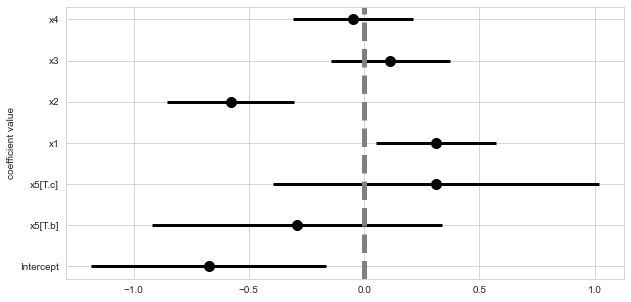

In [46]:
my_coefplot_h(fit_04)

Fit a model that has the categorical input, `x5`, interact with all continuous inputs, but the continuous inputs do **not** interact with each other.

In [47]:
fit_05 = smf.logit(formula = 'y ~ x5 * (x1 + x2 + x3 + x4)', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.569593
         Iterations 6


In [48]:
print( fit_05.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           14
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.1114
Time:                        19:40:25   Log-Likelihood:                -170.88
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                 9.001e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6359      0.257     -2.470      0.014      -1.141      -0.131
x5[T.b]       -0.3382      0.323     -1.048      0.295      -0.971       0.294
x5[T.c]        0.2464      0.374      0.659      0.5

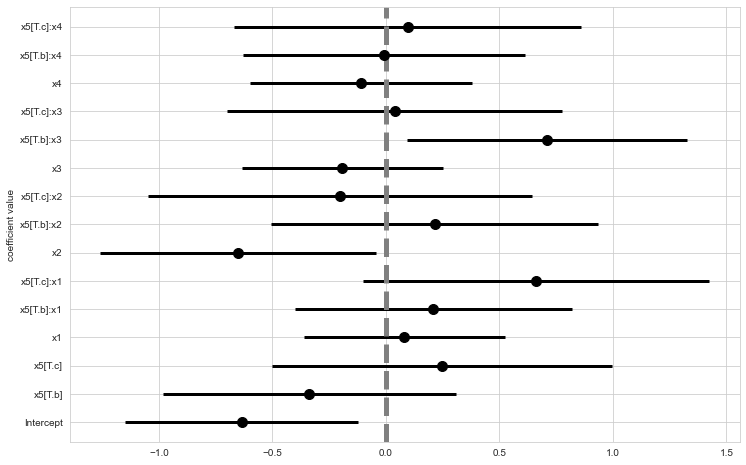

In [50]:
my_coefplot_h(fit_05, figsize_use=(12, 8))

A model with **all** pair-wise interactions including the categorical input.

In [51]:
fit_06 = smf.logit(formula = 'y ~ (x1 + x2 + x3 + x4 + x5)**2', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560799
         Iterations 6


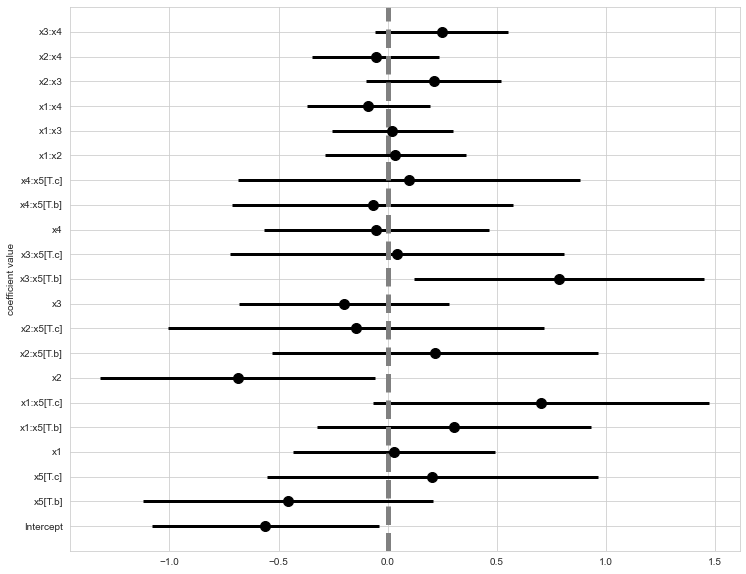

In [52]:
my_coefplot_h(fit_06, figsize_use=(12, 10))

All triplet or 3-way interactions.

In [53]:
fit_07 = smf.logit(formula = 'y ~ (x1 + x2 + x3 + x4 + x5)**3', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.526975
         Iterations 7


In [54]:
print( fit_07.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      263
Method:                           MLE   Df Model:                           36
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.1779
Time:                        19:45:25   Log-Likelihood:                -158.09
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                 0.0008882
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5142      0.279     -1.840      0.066      -1.062       0.034
x5[T.b]          -0.6577      0.367     -1.793      0.073      -1.377       0.061
x5[T.c]           0.2024      0.415     

In [55]:
fit_07 = smf.logit(formula = 'y ~ (x1 + x2 + x3 + x4 + x5)**5', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.497195
         Iterations 7


In [56]:
print( fit_07.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      252
Method:                           MLE   Df Model:                           47
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.2244
Time:                        19:46:16   Log-Likelihood:                -149.16
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                 0.0004154
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.5630      0.322     -1.746      0.081      -1.195       0.069
x5[T.b]                -0.5782      0.396     -1.460      0.144      -1.354       0.198
x5[T.c]         

Can I use quadratic terms?

$$ \mathrm{logodds} = \beta_0 + \beta_1 x_{n,1} + \beta_2 x_{n,1}^2 $$

$$ \mathrm{logodds} = \beta_0 + \beta_1 \sin(\pi x_{n,1}) $$

Consider a model with quadratic terms for all continuous inputs and the the linear terms interact with the categorical variable.

In [57]:
fit_08 = smf.logit( formula = 'y ~ np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2) + x5 * (x1 + x2 + x3 + x4)', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.489643
         Iterations 7


In [58]:
print( fit_08.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                           18
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.2362
Time:                        19:51:28   Log-Likelihood:                -146.89
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                 1.022e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4761      0.378      1.259      0.208      -0.265       1.217
x5[T.b]            -0.5031      0.373     -1.349      0.177      -1.234       0.228
x5[T.c]             0.1662      

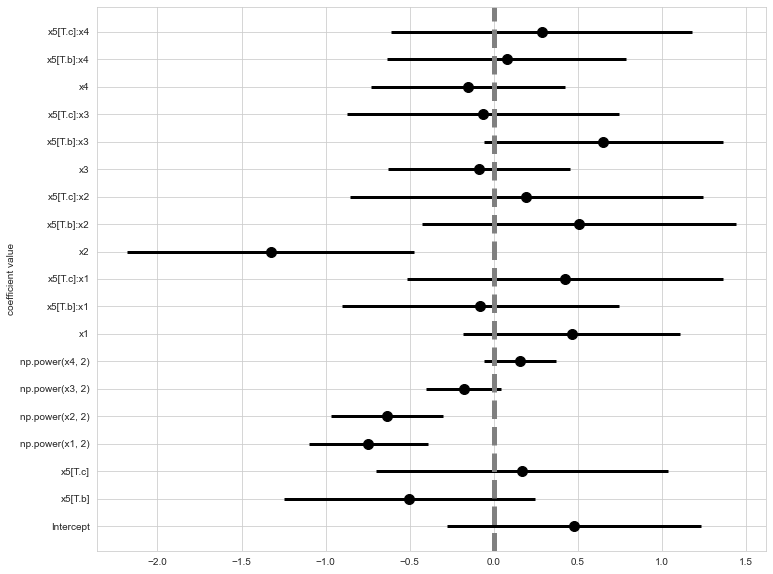

In [59]:
my_coefplot_h(fit_08, (12, 10))

Quadratic terms and then the categorical variable interacting with all pair-wise interactions of the continuous inputs.

In [60]:
fit_09 = smf.logit( formula = 'y ~ np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2) + x5 * ((x1 + x2 + x3 + x4)**2)', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.445709
         Iterations 8


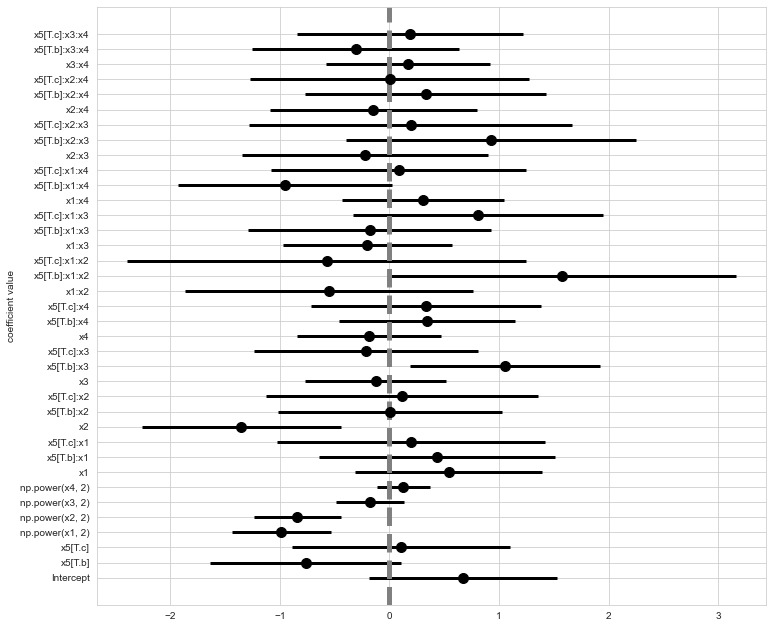

In [61]:
my_coefplot_h(fit_09, (12, 11))

In [62]:
fit_10 = smf.logit( formula = 'y ~ x5*(np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2) + (x1 + x2 + x3 + x4)**2 )', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.439301
         Iterations 8


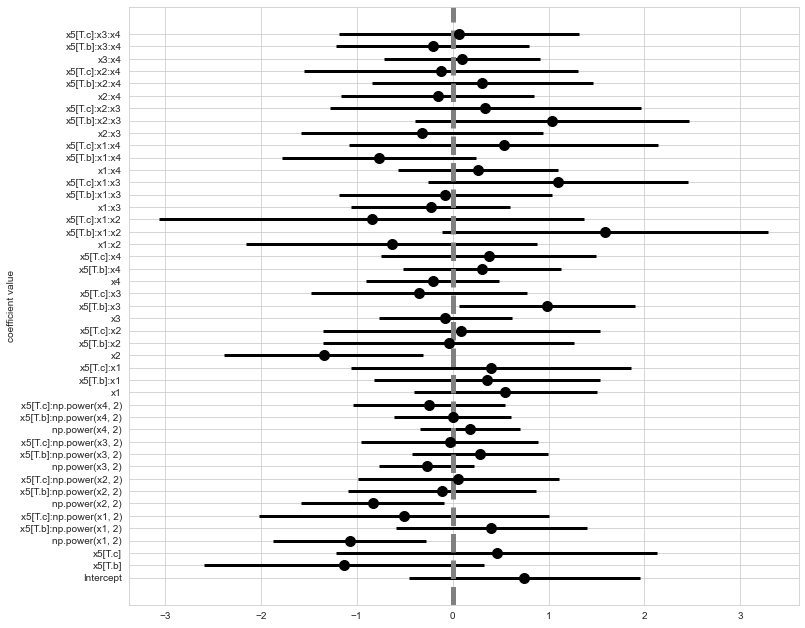

In [63]:
my_coefplot_h(fit_10, (12, 11))

## Binary classification performance metrics

Our observed response is either the event or the non-event, which we have encoded as `y=1` or `y=0`, respectively.

We fit 10 models, let's predict the training set with each model.

In [64]:
mod_list = [fit_01, fit_02, fit_03, fit_04, fit_05, fit_06, fit_07, fit_08, fit_09, fit_10]

In [65]:
df_copy_b = df.copy()

### Probability predictions

I want to make predictions, programmatically, and name the columns of the DataFrame such that we know which model the predictions are associated with. We will work with wide-format data.

In [66]:
'pred_probability_'+str(1)

'pred_probability_1'

In [67]:
'pred_probability_'+str(10)

'pred_probability_10'

In [68]:
'pred_probability_'+str(1).zfill(2)

'pred_probability_01'

In [69]:
'pred_probability_'+str(1).zfill(4)

'pred_probability_0001'

Let's iterate over all 10 models, and make predictions with each, and create a new column in our DataFrame `df_copy_b` associated with each model's prediction.

In [71]:
for i, mod in enumerate(mod_list):
    df_copy_b['pred_probability_'+str(1+i).zfill(2)] = mod.predict(df)

In [72]:
df_copy_b.head()

,x1,x2,x3,x4,x5,y,pred_probability_01,pred_probability_02,pred_probability_03,pred_probability_04,pred_probability_05,pred_probability_06,pred_probability_07,pred_probability_08,pred_probability_09,pred_probability_10
0,1.077412,-0.991094,0.208610,-1.019744,c,1,0.561362,0.544294,0.413333,0.649739,0.775635,0.749228,0.925002,0.772279,0.805083,0.751779
1,-0.637747,-0.307506,-1.794250,1.189993,b,0,0.262697,0.218863,0.286667,0.223334,0.109786,0.071407,0.201577,0.135894,0.140205,0.210628
2,1.345143,-1.075281,1.685044,0.167879,b,0,0.623647,0.579207,0.286667,0.564661,0.676346,0.640372,0.371830,0.428646,0.054458,0.126016
3,1.659924,0.735156,-0.210541,-2.534105,b,1,0.365854,0.438791,0.286667,0.315269,0.349479,0.495887,0.779253,0.210641,0.756321,0.798092
4,1.182378,1.599140,-0.301995,1.206648,b,0,0.200295,0.133946,0.286667,0.165568,0.164046,0.112427,0.116969,0.026200,0.034367,0.026993


### Classifications 

In [73]:
for i in range(len(mod_list)):
    df_copy_b['pred_class_'+str(1+i).zfill(2)] = np.where(df_copy_b['pred_probability_'+str(1+i).zfill(2)] > 0.5, 1, 0)

In [74]:
df_copy_b.head()

,x1,x2,x3,x4,x5,y,pred_probability_01,pred_probability_02,pred_probability_03,pred_probability_04,...,pred_class_01,pred_class_02,pred_class_03,pred_class_04,pred_class_05,pred_class_06,pred_class_07,pred_class_08,pred_class_09,pred_class_10
0,1.077412,-0.991094,0.208610,-1.019744,c,1,0.561362,0.544294,0.413333,0.649739,...,1,1,0,1,1,1,1,1,1,1
1,-0.637747,-0.307506,-1.794250,1.189993,b,0,0.262697,0.218863,0.286667,0.223334,...,0,0,0,0,0,0,0,0,0,0
2,1.345143,-1.075281,1.685044,0.167879,b,0,0.623647,0.579207,0.286667,0.564661,...,1,1,0,1,1,1,0,0,0,0
3,1.659924,0.735156,-0.210541,-2.534105,b,1,0.365854,0.438791,0.286667,0.315269,...,0,0,0,0,0,0,1,0,1,1
4,1.182378,1.599140,-0.301995,1.206648,b,0,0.200295,0.133946,0.286667,0.165568,...,0,0,0,0,0,0,0,0,0,0


### Accuracy on the training set

In [75]:
model_accuracy = []

for i in range(len(mod_list)):
    model_accuracy.append( df_copy_b.loc[ df_copy_b.y == df_copy_b['pred_class_'+str(1+i).zfill(2)] ].shape[0] / df_copy_b.shape[0] )

In [76]:
model_accuracy

[0.6266666666666667,
 0.6533333333333333,
 0.66,
 0.66,
 0.6933333333333334,
 0.6966666666666667,
 0.7433333333333333,
 0.7566666666666667,
 0.7666666666666667,
 0.76]

### Confusion matrix

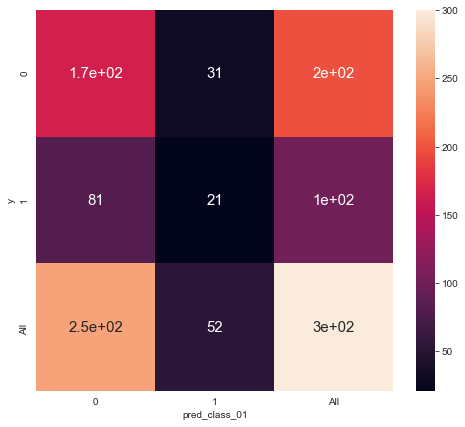

In [77]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy_b.y, df_copy_b.pred_class_01, margins=True), annot=True, annot_kws={'size':15}, ax=ax)

plt.show()

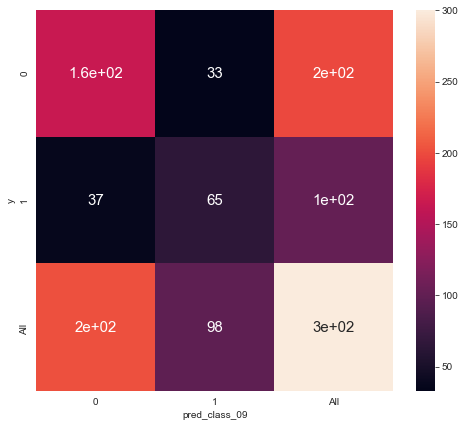

In [78]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy_b.y, df_copy_b.pred_class_09, margins=True), annot=True, annot_kws={'size':15}, ax=ax)

plt.show()

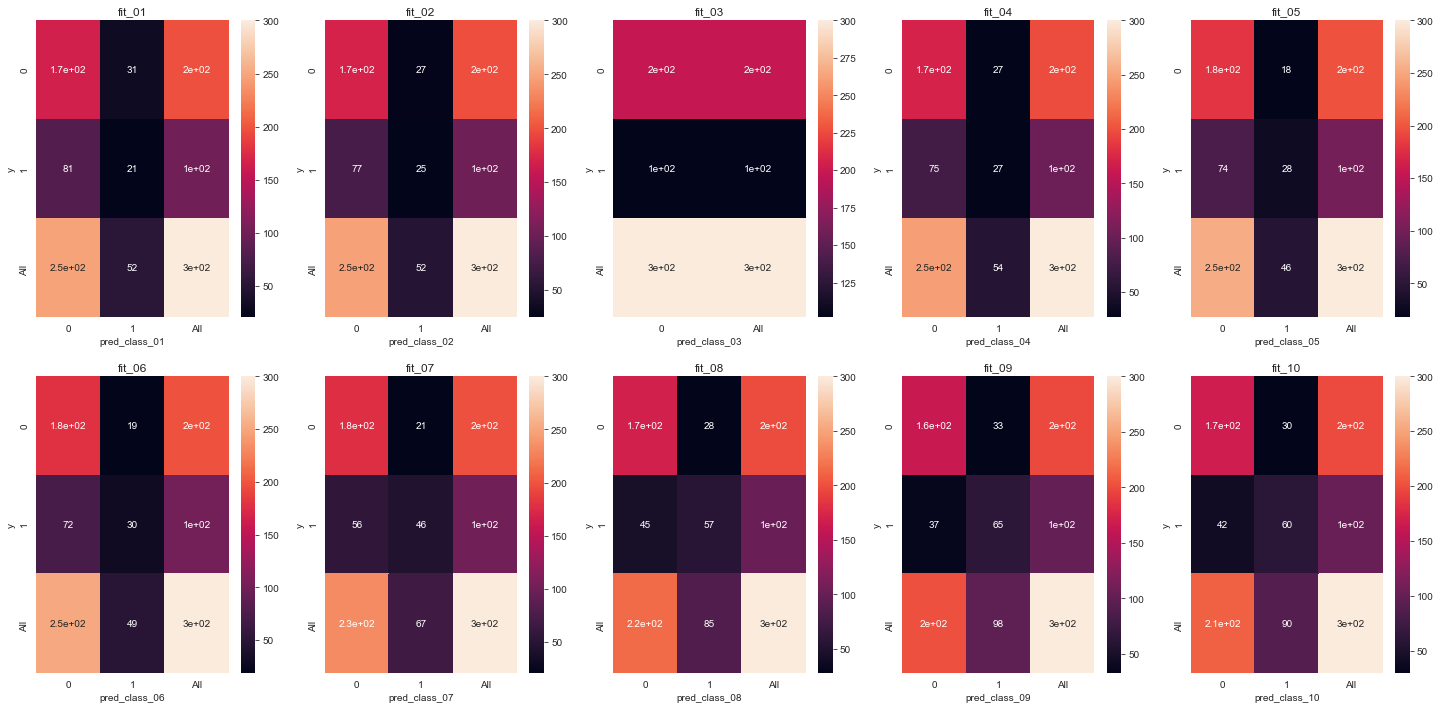

In [79]:
### all confusion matrices
fig, ax = plt.subplots(2, 5, figsize=(25, 12))

ax = ax.ravel()

for i in range(len(ax)):
    sns.heatmap(pd.crosstab(df_copy_b.y, df_copy_b['pred_class_'+str(1+i).zfill(2)], margins=True),
                annot=True, ax=ax[i])
    ax[i].set_title('fit_'+str(i+1).zfill(2))

plt.show()

## Vary the threshold

What happens if we decrease the threshold?

In [80]:
df_copy_c = df_copy_b.copy()

In [81]:
for i in range(len(mod_list)):
    df_copy_c['pred_class_'+str(1+i).zfill(2)] = np.where(df_copy_c['pred_probability_'+str(1+i).zfill(2)] > 0.25, 1, 0)

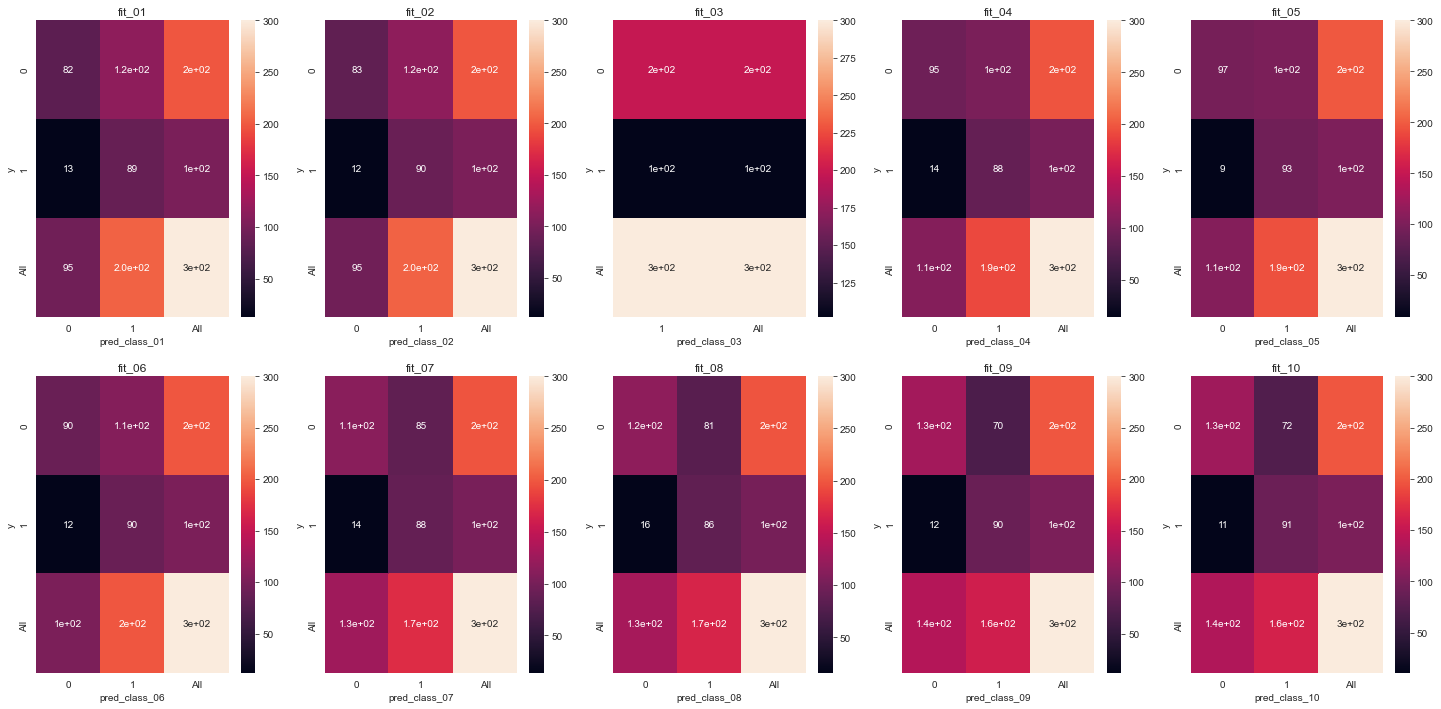

In [82]:
fig, ax = plt.subplots(2, 5, figsize=(25, 12))

ax = ax.ravel()

for i in range(len(ax)):
    sns.heatmap(pd.crosstab(df_copy_c.y, df_copy_c['pred_class_'+str(1+i).zfill(2)], margins=True),
                annot=True, ax=ax[i])
    ax[i].set_title('fit_'+str(i+1).zfill(2))

plt.show()

## ROC curve

In [83]:
from sklearn.metrics import roc_curve

In [86]:
def roc_values(mod_id, df_object):
    fpr, tpr, threshold = roc_curve(df_object.y.to_numpy(), df_object['pred_probability_'+str(mod_id+1).zfill(2)].to_numpy())
    res = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': threshold})
    res['model_name'] = 'fit_'+str(mod_id+1).zfill(2)
    
    return res

In [87]:
all_roc_curves_list = []

for i in range(len(mod_list)):
    all_roc_curves_list.append( roc_values(i, df_copy_b) )

In [88]:
all_roc_df = pd.concat(all_roc_curves_list)

In [89]:
all_roc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 97
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fpr         980 non-null    float64
 1   tpr         980 non-null    float64
 2   threshold   980 non-null    float64
 3   model_name  980 non-null    object 
dtypes: float64(3), object(1)
memory usage: 38.3+ KB


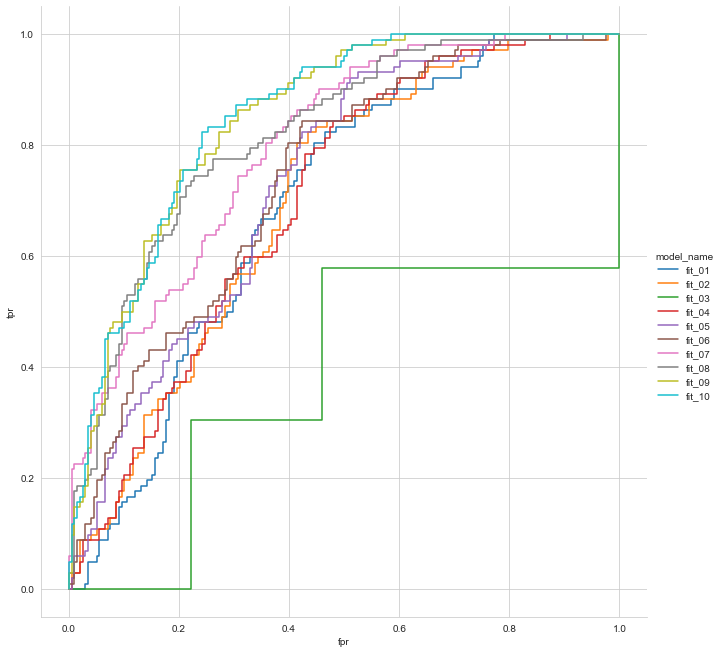

In [90]:
sns.relplot(data = all_roc_df, x='fpr', y='tpr', hue='model_name',
           estimator=None, units='model_name',
           kind='line',
           drawstyle='steps-post',
           height=9)

plt.show()

## Next week

We will discuss the differences between `statsmodels` and `sklearn`'s logistic regression implementations.